In [37]:
if(!require("DESeq2"))
  BiocManager::install("DESeq2","apeglm")
BiocManager::install("apeglm")
install.packages("tidyverse")
library(DESeq2)
library(tidyverse)
library(dplyr)
library(tidyr)
library(tibble)
library(ggplot2)
library(magrittr)
library("apeglm")

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.r-project.org

Bioconductor version 3.20 (BiocManager 1.30.25), R 4.4.3 (2025-02-28 ucrt)

Warning message:
"package(s) not installed when version(s) same as or greater than current; use
  `force = TRUE` to re-install: 'apeglm'"
Installation paths not writeable, unable to update packages
  path: C:/Program Files/R/R-4.4.3/library
  packages:
    cluster, foreign, lattice, MASS, Matrix, mgcv, nlme

Old packages: 'aplot', 'arrow', 'BiocManager', 'BiocParallel', 'cli', 'curl',
  'data.table', 'Deriv', 'doBy', 'evaluate', 'future', 'future.apply',
  'gapminder', 'gganimate', 'ggforce', 'ggfun', 'ggnewscale', 'ggpubr',
  'ggtangle', 'gh', 'haven', 'jsonlite', 'magick', 'openssl', 'packrat',
  'parallelly', 'patchwork', 'pbdZMQ', 'pheatmap', 'pkgbuild', 'pkgdown',
  'plotly', 'promises', 'RcppArmadillo', 'rentrez',

In [3]:
count_matrix<- read.delim("C:\\Users\\Ermias\\Documents\\data visualization\\R_project\\GSE58135.countmatrix.txt",
                          row.names = 1,sep = ",")
anno<- read.delim("C:\\Users\\Ermias\\Documents\\data visualization\\R_project\\SraRunTable_GSE58135.pam50.txt",
                  row.names = 1,sep = ",")

In [4]:
count_matrix<-count_matrix[,rownames(anno)]
rownames(anno) <- colnames(count_matrix)

In [5]:
dds <-DESeqDataSetFromMatrix(countData = count_matrix,
                             colData = anno,
                             design = ~ source_name)

Warning message in DESeqDataSet(se, design = design, ignoreRank):
"some variables in design formula are characters, converting to factors"
  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]



In [6]:
dds

class: DESeqDataSet 
dim: 60676 140 
metadata(1): version
assays(1): counts
rownames(60676): ENSG00000223972 ENSG00000227232 ... ENSG00000277475
  ENSG00000268674
rowData names(0):
colnames(140): SRR1313090 SRR1313091 ... SRR1313228 SRR1313229
colData names(1): source_name

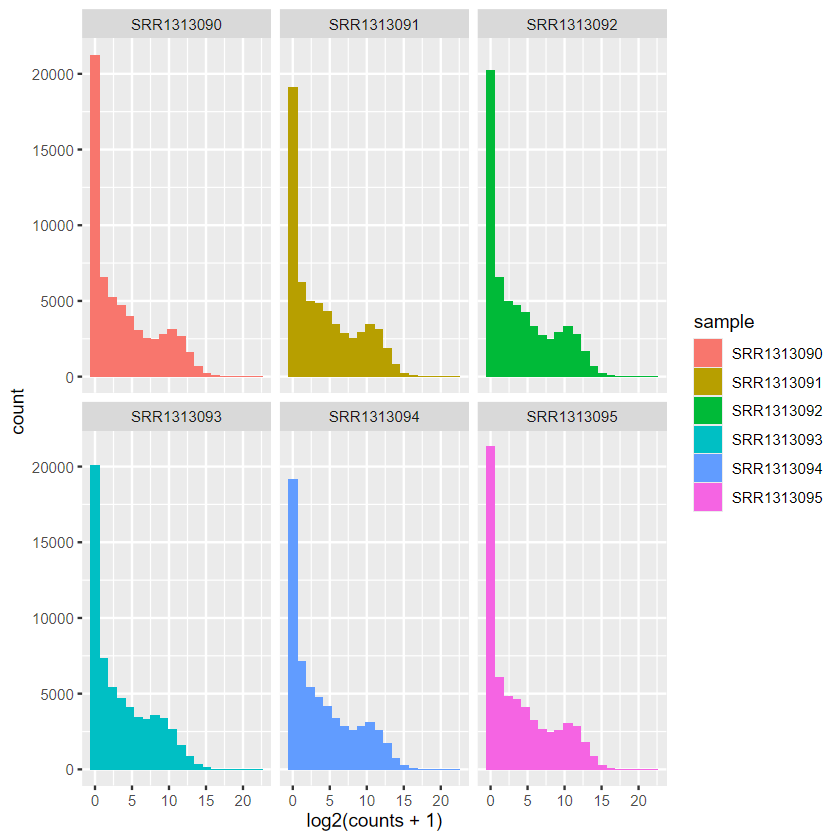

In [7]:
as_tibble(assay(dds), rownames = "source_name") %>%
  pivot_longer(names_to = "sample", values_to = "counts", cols = 2:7) %>% 
  ggplot(aes(x = log2(counts + 1), fill = sample)) +
  geom_histogram(bins = 20) +
  facet_wrap(~ sample)

In [8]:
dds <- dds[rowSums(assay(dds)) > 0,]
dim(dds)

[1] 57806   140

In [12]:
dds <- DESeq(dds)

estimating size factors

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

final dispersion estimates

fitting model and testing

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  fo

In [13]:
vsd <- vst(dds, blind = TRUE)

using ntop=500 top features by variance



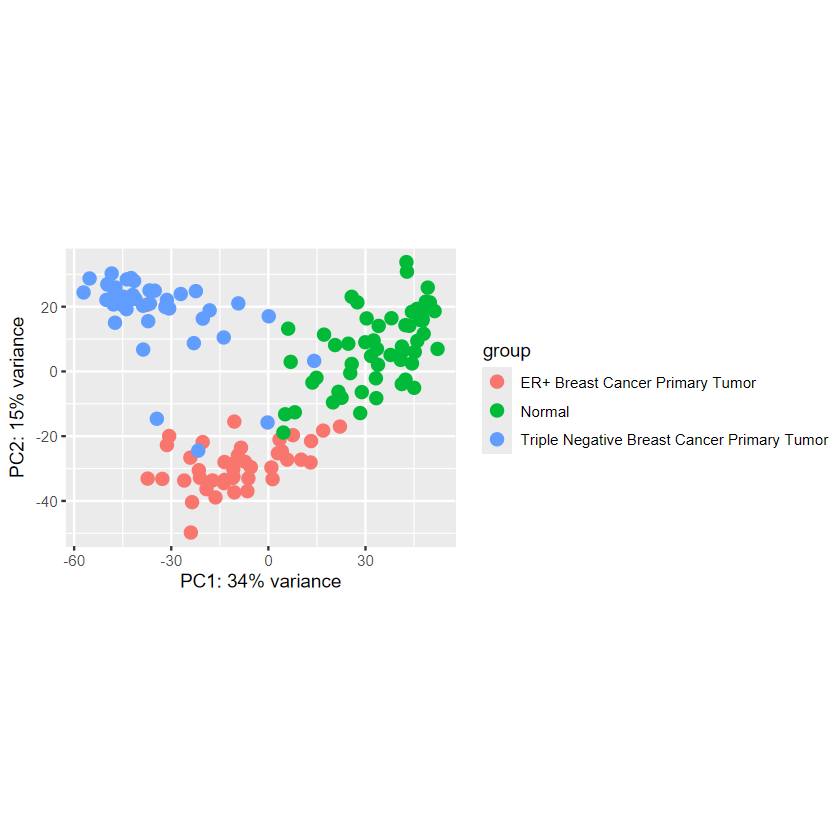

In [14]:
plotPCA(vsd,intgroup="source_name")

In [15]:
pca_data <- plotPCA(vsd,intgroup="source_name",returnData=TRUE)

using ntop=500 top features by variance



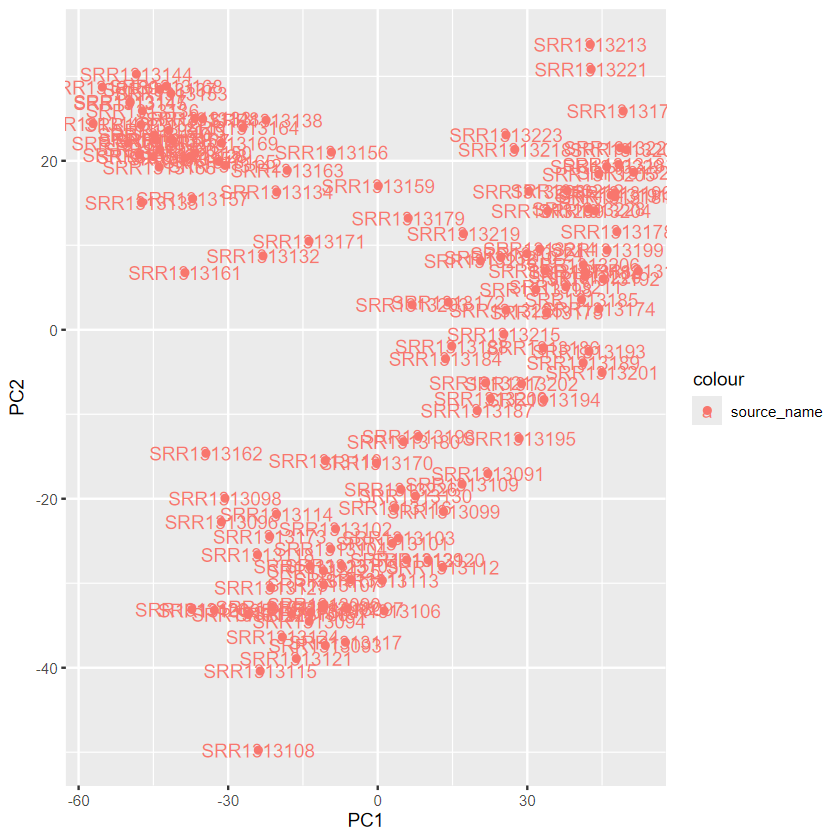

In [16]:
ggplot(pca_data,aes(x = PC1 , y= PC2,color = "source_name",label = name))+
  geom_point()+
  geom_text()

In [18]:
sizeFactors(dds)

SRR1313090 SRR1313091 SRR1313092 SRR1313093 SRR1313094 SRR1313095 SRR1313096 
2.20039592 2.70082821 2.38834895 1.01424872 2.35228654 2.65730475 1.59846038 
SRR1313097 SRR1313098 SRR1313099 SRR1313100 SRR1313101 SRR1313102 SRR1313103 
2.90395102 1.90881667 2.15729884 3.53188675 3.03804776 2.95230505 2.54775353 
SRR1313104 SRR1313105 SRR1313106 SRR1313107 SRR1313108 SRR1313109 SRR1313110 
2.02259411 2.24452910 2.84386972 2.37120137 0.91471579 2.47382161 3.18233423 
SRR1313111 SRR1313112 SRR1313113 SRR1313114 SRR1313115 SRR1313116 SRR1313117 
2.00530306 2.83377694 2.69971193 3.15169643 1.66189195 2.56660331 2.63732427 
SRR1313118 SRR1313119 SRR1313120 SRR1313121 SRR1313122 SRR1313123 SRR1313124 
3.55331353 2.43910535 2.03911415 3.37975408 2.22977084 2.22433930 2.44085041 
SRR1313125 SRR1313126 SRR1313127 SRR1313128 SRR1313129 SRR1313130 SRR1313131 
2.71795570 2.15815920 2.54505325 1.46092391 2.25338404 4.56655939 0.96590716 
SRR1313132 SRR1313133 SRR1313134 SRR1313135 SRR1313136 SRR1313137 SRR1313138 
0.63020175 1.40228737 0.60445474 0.88061833 0.58558511 1.55667021 1.37072756 
SRR1313139 SRR1313140 SRR1313141 SRR1313142 SRR1313143 SRR1313144 SRR1313145 
0.83233461 1.11222699 0.37845466 0.56829503 0.17745063 0.33009266 0.35166754 
SRR1313146 SRR1313147 SRR1313148 SRR1313149 SRR1313150 SRR1313151 SRR1313152 
0.29881030 3.06287527 3.68825190 0.22914935 3.44310262 2.18283953 1.83747488 
SRR1313153 SRR1313154 SRR1313155 SRR1313156 SRR1313157 SRR1313158 SRR1313159 
2.08381533 1.57042855 1.19265957 1.62537503 5.80142837 0.35545347 2.08481488 
SRR1313160 SRR1313161 SRR1313162 SRR1313163 SRR1313164 SRR1313165 SRR1313166 
0.09482393 2.69758042 0.10913730 0.03136619 1.20392403 1.90148623 1.06298011 
SRR1313167 SRR1313168 SRR1313169 SRR1313170 SRR1313171 SRR1313172 SRR1313173 
3.15639065 0.67668062 1.19861239 1.39646117 0.32662712 0.07993428 0.20821852 
SRR1313174 SRR1313175 SRR1313176 SRR1313177 SRR1313178 SRR1313179 SRR1313180 
0.60685986 1.44347220 1.54335536 0.04473700 0.42253576 0.69539430 0.16563679 
SRR1313181 SRR1313182 SRR1313183 SRR1313184 SRR1313185 SRR1313186 SRR1313187 
1.59774826 1.90586624 1.22377332 1.30619192 1.41317950 1.35298608 1.76178796 
SRR1313188 SRR1313189 SRR1313190 SRR1313191 SRR1313192 SRR1313193 SRR1313194 
0.86672951 0.76769661 1.14358776 0.08213157 0.77560795 1.10104544 1.12328102 
SRR1313195 SRR1313196 SRR1313197 SRR1313198 SRR1313199 SRR1313200 SRR1313201 
0.38623199 0.87460483 0.90731161 1.19398664 0.89941845 0.76088488 0.10707156 
SRR1313202 SRR1313203 SRR1313204 SRR1313205 SRR1313206 SRR1313207 SRR1313208 
0.24881672 0.16991581 1.91337641 0.26753743 0.28906911 0.18373533 0.20472383 
SRR1313209 SRR1313210 SRR1313211 SRR1313212 SRR1313213 SRR1313214 SRR1313215 
0.36216001 0.36733340 0.25337796 0.26028825 0.46415948 0.52536504 0.49935604 
SRR1313216 SRR1313217 SRR1313218 SRR1313219 SRR1313220 SRR1313221 SRR1313222 
2.57892572 0.56311702 0.57681899 0.38481189 3.69494985 0.31189889 0.34340226 
SRR1313223 SRR1313224 SRR1313225 SRR1313226 SRR1313227 SRR1313228 SRR1313229 
2.43476842 4.75236581 0.44311858 3.80032373 0.37696514 0.56579516 0.59249334

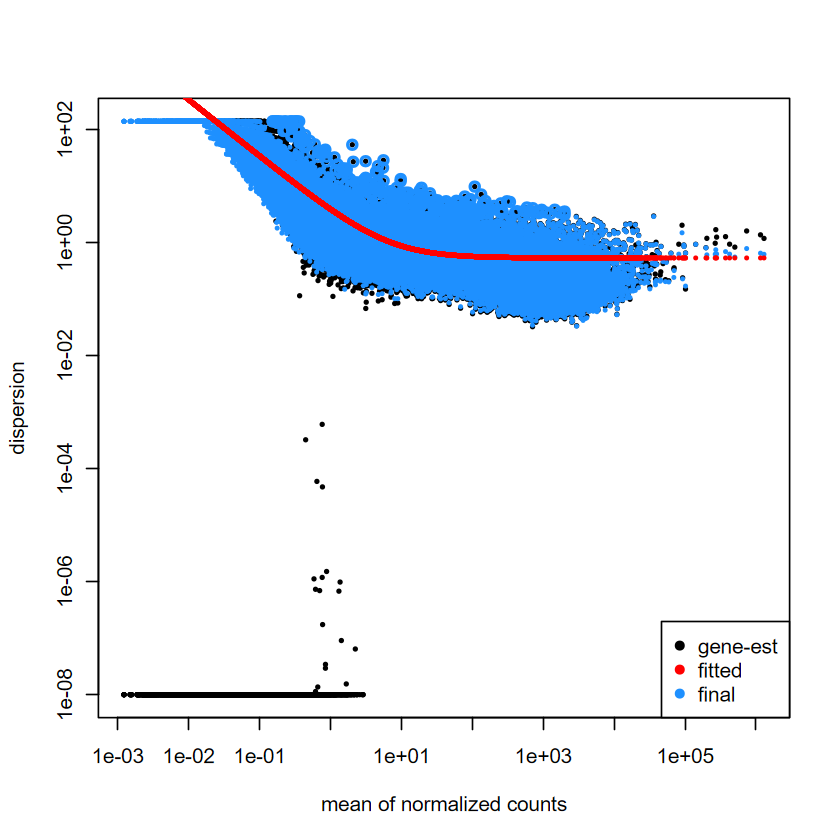

In [19]:
plotDispEsts(dds)

In [20]:
resultsNames(dds)

[1] "Intercept"                                                                                 
[2] "source_name_Normal_vs_ER..Breast.Cancer.Primary.Tumor"                                     
[3] "source_name_Triple.Negative.Breast.Cancer.Primary.Tumor_vs_ER..Breast.Cancer.Primary.Tumor"

In [21]:
dds$source_name

[1] ER+ Breast Cancer Primary Tumor            
  [2] ER+ Breast Cancer Primary Tumor            
  [3] ER+ Breast Cancer Primary Tumor            
  [4] ER+ Breast Cancer Primary Tumor            
  [5] ER+ Breast Cancer Primary Tumor            
  [6] ER+ Breast Cancer Primary Tumor            
  [7] ER+ Breast Cancer Primary Tumor            
  [8] ER+ Breast Cancer Primary Tumor            
  [9] ER+ Breast Cancer Primary Tumor            
 [10] ER+ Breast Cancer Primary Tumor            
 [11] ER+ Breast Cancer Primary Tumor            
 [12] ER+ Breast Cancer Primary Tumor            
 [13] ER+ Breast Cancer Primary Tumor            
 [14] ER+ Breast Cancer Primary Tumor            
 [15] ER+ Breast Cancer Primary Tumor            
 [16] ER+ Breast Cancer Primary Tumor            
 [17] ER+ Breast Cancer Primary Tumor            
 [18] ER+ Breast Cancer Primary Tumor            
 [19] ER+ Breast Cancer Primary Tumor            
 [20] ER+ Breast Cancer Primary Tumor            
 [21] ER+ Breast Cancer Primary Tumor            
 [22] ER+ Breast Cancer Primary Tumor            
 [23] ER+ Breast Cancer Primary Tumor            
 [24] ER+ Breast Cancer Primary Tumor            
 [25] ER+ Breast Cancer Primary Tumor            
 [26] ER+ Breast Cancer Primary Tumor            
 [27] ER+ Breast Cancer Primary Tumor            
 [28] ER+ Breast Cancer Primary Tumor            
 [29] ER+ Breast Cancer Primary Tumor            
 [30] ER+ Breast Cancer Primary Tumor            
 [31] ER+ Breast Cancer Primary Tumor            
 [32] ER+ Breast Cancer Primary Tumor            
 [33] ER+ Breast Cancer Primary Tumor            
 [34] ER+ Breast Cancer Primary Tumor            
 [35] ER+ Breast Cancer Primary Tumor            
 [36] ER+ Breast Cancer Primary Tumor            
 [37] ER+ Breast Cancer Primary Tumor            
 [38] ER+ Breast Cancer Primary Tumor            
 [39] ER+ Breast Cancer Primary Tumor            
 [40] ER+ Breast Cancer Primary Tumor            
 [41] ER+ Breast Cancer Primary Tumor            
 [42] ER+ Breast Cancer Primary Tumor            
 [43] Triple Negative Breast Cancer Primary Tumor
 [44] Triple Negative Breast Cancer Primary Tumor
 [45] Triple Negative Breast Cancer Primary Tumor
 [46] Triple Negative Breast Cancer Primary Tumor
 [47] Triple Negative Breast Cancer Primary Tumor
 [48] Triple Negative Breast Cancer Primary Tumor
 [49] Triple Negative Breast Cancer Primary Tumor
 [50] Triple Negative Breast Cancer Primary Tumor
 [51] Triple Negative Breast Cancer Primary Tumor
 [52] Triple Negative Breast Cancer Primary Tumor
 [53] Triple Negative Breast Cancer Primary Tumor
 [54] Triple Negative Breast Cancer Primary Tumor
 [55] Triple Negative Breast Cancer Primary Tumor
 [56] Triple Negative Breast Cancer Primary Tumor
 [57] Triple Negative Breast Cancer Primary Tumor
 [58] Triple Negative Breast Cancer Primary Tumor
 [59] Triple Negative Breast Cancer Primary Tumor
 [60] Triple Negative Breast Cancer Primary Tumor
 [61] Triple Negative Breast Cancer Primary Tumor
 [62] Triple Negative Breast Cancer Primary Tumor
 [63] Triple Negative Breast Cancer Primary Tumor
 [64] Triple Negative Breast Cancer Primary Tumor
 [65] Triple Negative Breast Cancer Primary Tumor
 [66] Triple Negative Breast Cancer Primary Tumor
 [67] Triple Negative Breast Cancer Primary Tumor
 [68] Triple Negative Breast Cancer Primary Tumor
 [69] Triple Negative Breast Cancer Primary Tumor
 [70] Triple Negative Breast Cancer Primary Tumor
 [71] Triple Negative Breast Cancer Primary Tumor
 [72] Triple Negative Breast Cancer Primary Tumor
 [73] Triple Negative Breast Cancer Primary Tumor
 [74] Triple Negative Breast Cancer Primary Tumor
 [75] Triple Negative Breast Cancer Primary Tumor
 [76] Triple Negative Breast Cancer Primary Tumor
 [77] Triple Negative Breast Cancer Primary Tumor
 [78] Triple Negative Breast Cancer Primary Tumor
 [79] Triple Negative Breast Cancer Primary Tumor
 [80] Triple Negative Breast Cancer Primary Tumor
 [

In [22]:
dds$source_name <- relevel(dds$source_name, ref="ER+ Breast Cancer Primary Tumor")
dds <- DESeq(dds)
resultsNames(dds)

using pre-existing size factors

estimating dispersions

found already estimated dispersions, replacing these

gene-wise dispersion estimates

mean-dispersion relationship

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

final dispersion estimates

fitting model and testing

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

-- replacing outliers and refitting for 3207 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersion

[1] "Intercept"                                                                                 
[2] "source_name_Normal_vs_ER..Breast.Cancer.Primary.Tumor"                                     
[3] "source_name_Triple.Negative.Breast.Cancer.Primary.Tumor_vs_ER..Breast.Cancer.Primary.Tumor"

In [23]:
res <- results(dds,
               name="source_name_Normal_vs_ER..Breast.Cancer.Primary.Tumor")

In [24]:
res <- results(dds,
               contrast=c("source_name","Normal","ER+ Breast Cancer Primary Tumor"))

In [25]:
res_tbl <- as.tibble(res, rownames="ENSEMBL")
res_tbl

Warning message:
"`as.tibble()` was deprecated in tibble 2.0.0.
ℹ Please use `as_tibble()` instead.
ℹ The signature and semantics have changed, see `?as_tibble`."


ENSEMBL,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000223972,7.571217e-01,-1.83456569,0.4562248,-4.0211880,5.790537e-05,1.849396e-04
ENSG00000227232,1.386703e+02,-1.62281296,0.1901797,-8.5330496,1.425395e-17,2.211620e-16
ENSG00000278267,1.515254e+01,-2.33953772,0.2379805,-9.8307969,8.295967e-23,2.436654e-21
ENSG00000243485,9.205552e-02,1.36389694,1.0627060,1.2834189,1.993453e-01,NA
ENSG00000237613,2.533969e-02,1.84040147,3.4108298,0.5395759,5.894896e-01,NA
ENSG00000268020,1.022485e-02,1.85365643,3.5086024,0.5283176,5.972789e-01,NA
ENSG00000240361,2.287642e-01,0.68611962,1.0901454,0.6293836,5.290980e-01,6.324894e-01
ENSG00000186092,1.206187e-01,0.58224414,1.9688808,0.2957234,7.674413e-01,NA
ENSG00000238009,1.535814e+00,-1.20562710,0.4159192,-2.8987053,3.747069e-03,8.856016e-03


In [26]:
res_tbl %>%
  arrange(padj) %>%
  head(5)

ENSEMBL,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000172059,739.7944,2.513284,0.1295351,19.40234,7.374252e-84,3.684250e-79
ENSG00000112531,1878.2155,2.192905,0.1202227,18.24036,2.468479e-74,6.166385e-70
ENSG00000115306,18687.6701,3.110745,0.1711345,18.17719,7.823510e-74,1.302901e-69
ENSG00000163513,4664.1170,3.280847,0.1854926,17.68721,5.262127e-70,6.572528e-66
ENSG00000158106,13148.9316,-3.413929,0.1970534,-17.32489,3.052672e-67,3.050291e-63


In [27]:
best_genes <- res_tbl %>%
  arrange(padj) %>%
  head(5) %>%pull(ENSEMBL)

rowMeans(counts(dds[best_genes],normalize = TRUE))

ENSG00000172059 ENSG00000112531 ENSG00000115306 ENSG00000163513 ENSG00000158106 
       739.7944       1878.2155      18687.6701       4664.1170      13148.9316

In [28]:
metadata(res)$filterThreshold

13.57143% 
0.1329749

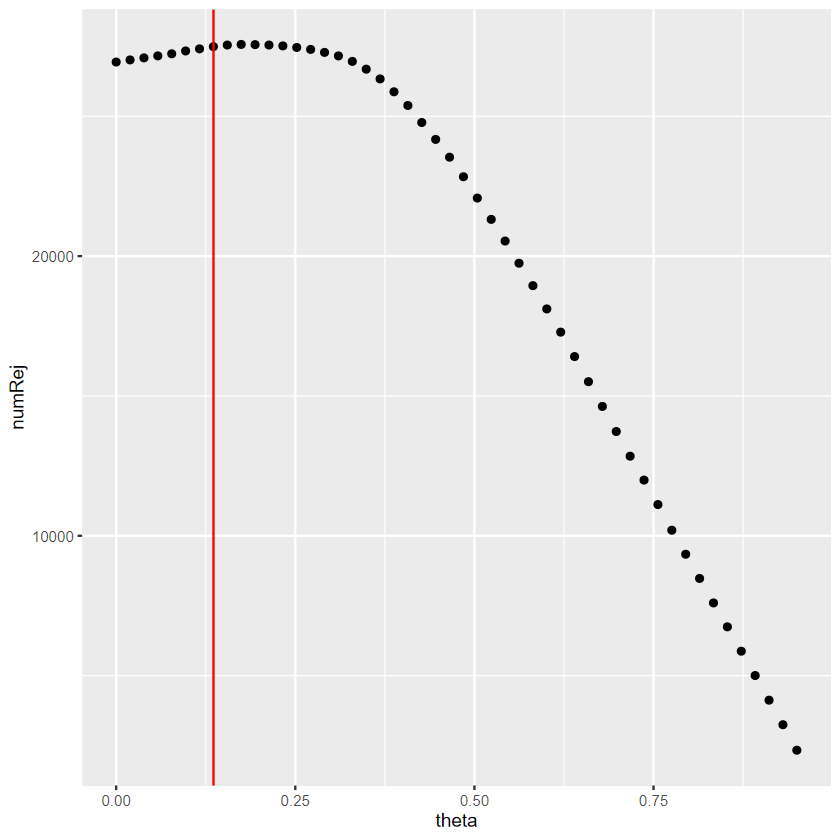

In [29]:
as_tibble(metadata(res)$filterNumRej) %>%
  ggplot(aes(x = theta, y = numRej)) +
  geom_point() +
  geom_vline(xintercept = 0.136,
             color = 'red')

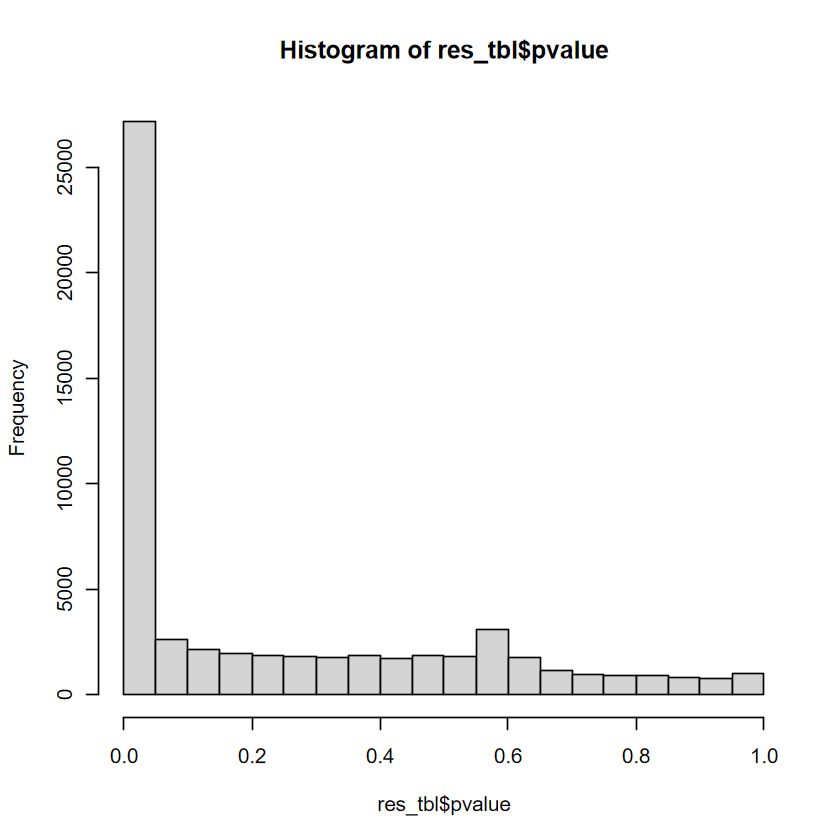

In [30]:
hist(res_tbl$pvalue)

In [31]:
res_tbl %>%
  filter(pvalue >0.57 & pvalue <0.6) %>%
  head(12)

ENSEMBL,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000237613,0.025339693,1.8404015,3.4108298,0.5395759,0.5894896,NA
ENSG00000268020,0.010224851,1.8536564,3.5086024,0.5283176,0.5972789,NA
ENSG00000222623,0.002645785,1.9223543,3.5086024,0.5478975,0.5837623,NA
ENSG00000284733,0.003502922,1.9223543,3.5086024,0.5478975,0.5837623,NA
ENSG00000235146,0.005225982,1.8536564,3.5086024,0.5283176,0.5972789,NA
ENSG00000268663,0.002419417,1.9223543,3.5086024,0.5478975,0.5837623,NA
ENSG00000284662,0.003502922,1.9223543,3.5086024,0.5478975,0.5837623,NA
ENSG00000223181,0.429761771,0.3403551,0.6159667,0.5525545,0.5805685,0.6780062
ENSG00000237058,0.028149264,1.8102871,3.3479627,0.5407131,0.5887054,NA


In [32]:
res_tbl %>%
  filter(pvalue >0.57 & pvalue <0.6)%>%
  dplyr::select(padj) %>%
  summary()

      padj       
 Min.   :0.6688  
 1st Qu.:0.6760  
 Median :0.6823  
 Mean   :0.6822  
 3rd Qu.:0.6890  
 Max.   :0.6943  
 NA's   :1564    

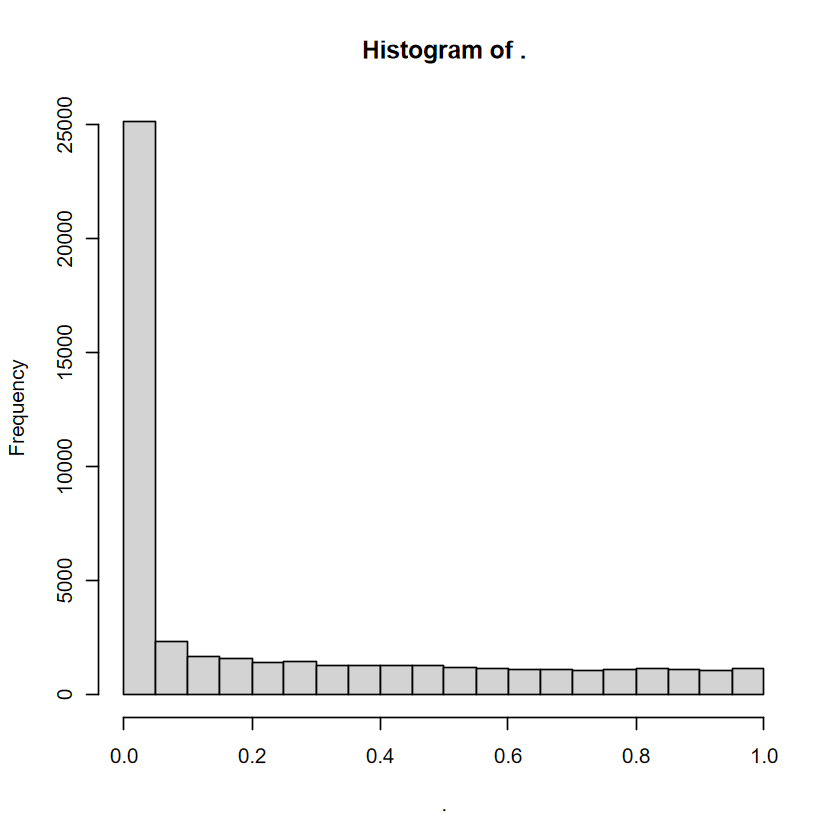

In [33]:
res_tbl %>%
  filter(baseMean >metadata(res)$filterThreshold) %>%
  pull(padj) %>%
  hist()

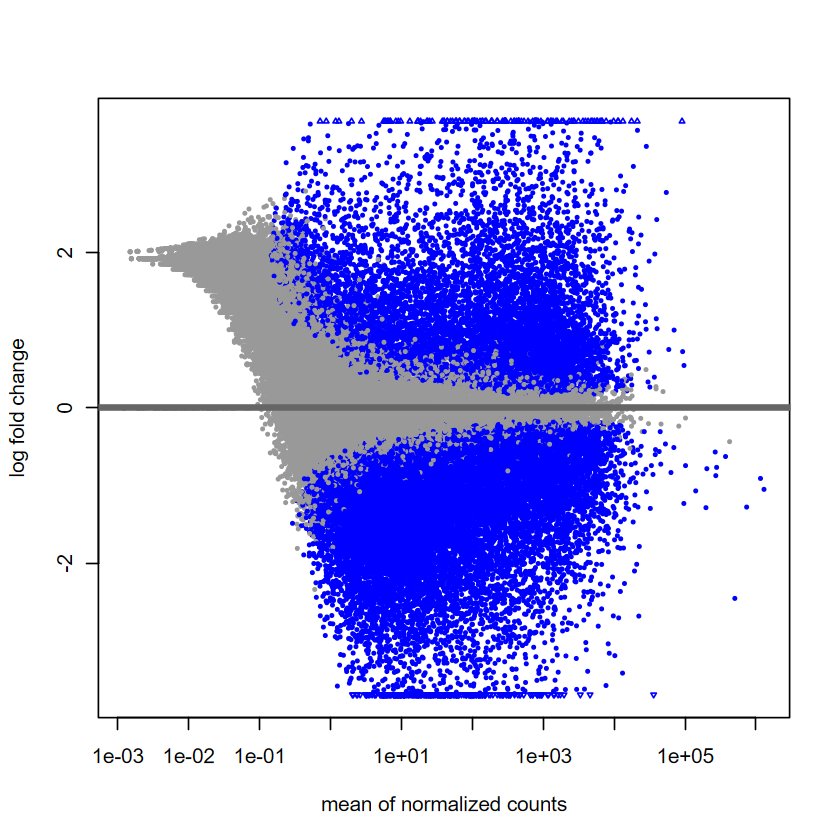

In [34]:
plotMA(res)

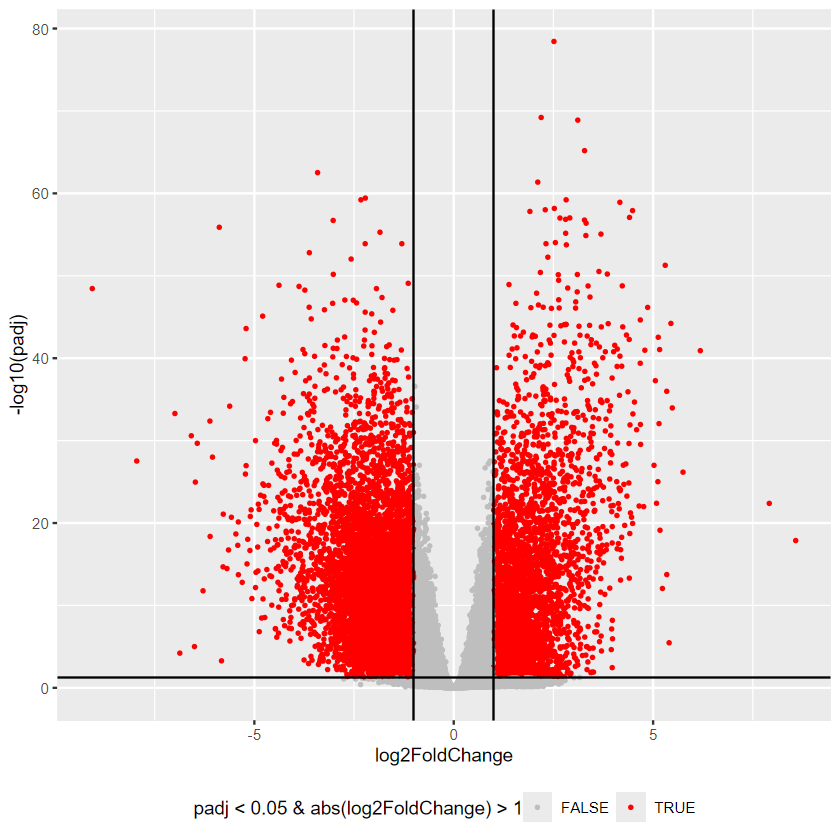

In [35]:
res_tbl %>%
  filter(!is.na(padj)) %>%
  ggplot(aes(x = log2FoldChange, y = -log10(padj),
             color = padj < 0.05 & abs(log2FoldChange) > 1)) +
  scale_colour_manual(values = c("gray", "red")) +
  geom_point(size = 0.5) +
  geom_hline(yintercept = -log10(0.05)) +
  geom_vline(xintercept = 1) +
  geom_vline(xintercept = -1) +
  theme(legend.position = "bottom")

using 'apeglm' for LFC shrinkage. If used in published research, please cite:
    Zhu, A., Ibrahim, J.G., Love, M.I. (2018) Heavy-tailed prior distributions for
    sequence count data: removing the noise and preserving large differences.
    Bioinformatics. https://doi.org/10.1093/bioinformatics/bty895



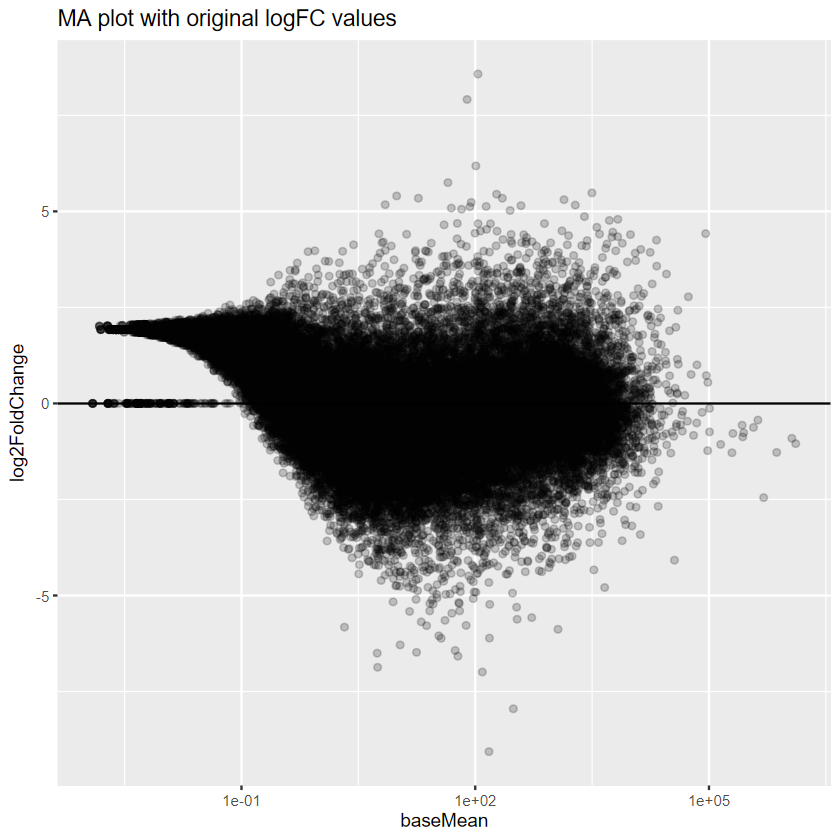

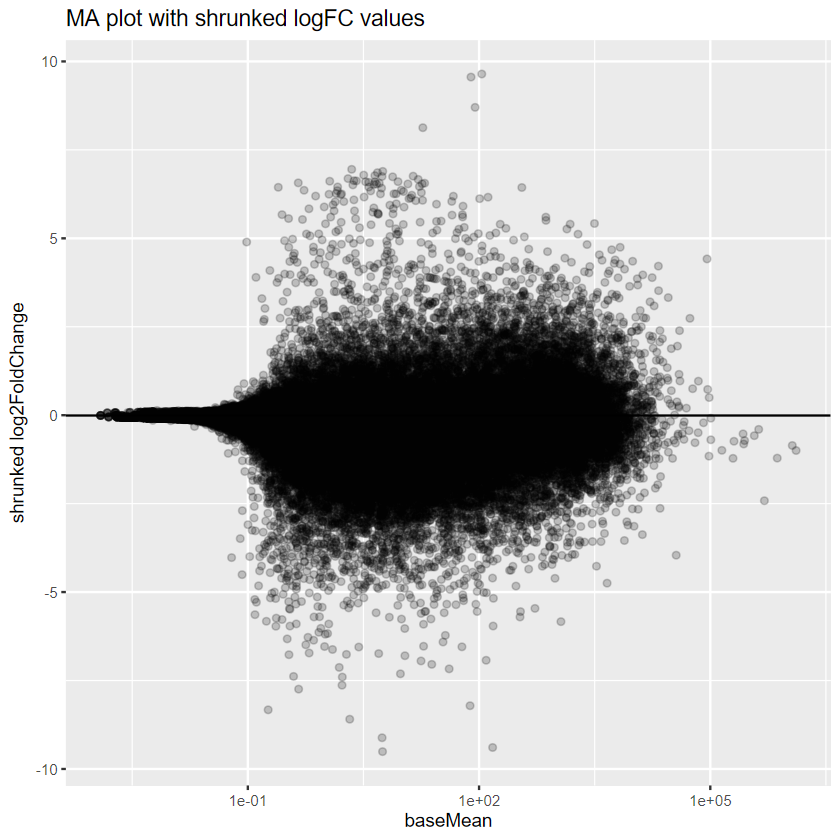

In [36]:
res_shr <- lfcShrink(dds, coef = "source_name_Normal_vs_ER..Breast.Cancer.Primary.Tumor")
res_shr_tbl <- as_tibble(res_shr, rownames = "ENSEMBL")
# Original MA plot
fig1 <- ggplot(res_tbl, aes(x = baseMean, y = log2FoldChange)) +
  geom_point(data = res_tbl, alpha = 0.2) +
  scale_x_log10() +
  geom_hline(yintercept = 0) +
  ggtitle("MA plot with original logFC values")

print(fig1)

# Shrunk MA plot
fig2 <- ggplot(res_shr_tbl, aes(x = baseMean, y = log2FoldChange)) +
  geom_point(data = res_shr_tbl, alpha = 0.2) +
  scale_x_log10() +
  geom_hline(yintercept = 0) +
  ylab("shrunked log2FoldChange") +
  ggtitle("MA plot with shrunked logFC values")


print(fig2)